# Perkenalan

## Team :
1. Nichoulaus Verdhy P - PYTN-KS011-023
2. Tassyirifiyya - PYTN-KS011-012
3. Isma - PYTN-KS011-008

Python for Data Science - Studi Independen - Kampus Merdeka

## Latar Belakang

Dataset WeatherAUS adalah dataset yang berisi data cuaca di beberapa kota di Australia selama beberapa tahun. Data diambil dari Australian Bureau of Meteorology dan terdiri dari informasi cuaca harian seperti suhu, kelembaban, kecepatan angin, dan curah hujan, Dataset ini sering digunakan dalam analisis prediksi cuaca.

Tujuan utama dari dataset ini adalah untuk memprediksi apakah akan terjadi hujan pada hari berikutnya berdasarkan data cuaca pada hari sebelumnya. Variabel target dalam dataset ini adalah "RainTomorrow" yang menunjukkan apakah akan hujan atau tidak pada hari berikutnya. Selain itu, dataset ini juga berisi beberapa variabel input seperti lokasi, tanggal, suhu maksimum dan minimum, kelembaban, tekanan udara, dan kecepatan angin.

Beberapa analisis dan prediksi yang dapat dilakukan dengan dataset WeatherAUS adalah:

1. Prediksi apakah akan turun hujan pada hari berikutnya 

2. Analisis hubungan antara curah hujan dan faktor-faktor cuaca lainnya seperti suhu, kelembapan, dan arah angin 

3. Analisis pola cuaca di berbagai wilayah di Australia

4. Prediksi curah hujan bulanan di suatu wilayah di Australia 

5. Analisis perubahan cuaca di Australia selama sepuluh tahun terakhir 

Dataset WeatherAUS penting karena dapat membantu dalam memprediksi cuaca di masa depan dan membantu orang dalam membuat keputusan yang tepat, seperti memilih pakaian yang sesuai, membawa payung Dan lain-lainnya

## Objektif

Final Project 2 ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM
sebagai berikut:

● Mampu memahami konsep Classification dengan Logistic Regression dan SVM

● Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression
dan SVM

● Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat
prediksi

# Import Pustaka

In [1]:
#untuk dataframe
import pandas as pd
import numpy as np

#untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
from folium.plugins import FastMarkerCluster

#mengatur display biar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

#modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score # mencari accurasi 
from sklearn.metrics import confusion_matrix # membuat confusion maytris
from sklearn.metrics import classification_report # laporan klasifikasi
from sklearn.metrics import r2_score # evaluasi performa model
from sklearn.metrics import mean_squared_error # menghitung nilai error rata-rata


# Data Loading

## Memanggil Data set

In [104]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Melihat ukuran data(baris, kolom)

In [3]:
df.shape

(145460, 23)

## Pengecekan Nama Kolom

In [4]:
df.columns.values

array(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'], dtype=object)

## Penjelasan Per kolom

1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi

## Tipe Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Deskriptif Statistik

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## Pengecekan Missing Value

In [7]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## Penghitungan Persentasi Missing Value

In [8]:
for col in df.columns:
    null_count = df[col].isnull().sum()
    total_count = len(df[col])
    perc_missing = (null_count / total_count) * 100
    
    print(f"Kolom {col}:")
    print(f"Jumlah nilai null: {null_count}")
    print(f"Total data: {total_count}")
    print(f"Persentase missing value: {perc_missing:.2f}%\n")

Kolom Date:
Jumlah nilai null: 0
Total data: 145460
Persentase missing value: 0.00%

Kolom Location:
Jumlah nilai null: 0
Total data: 145460
Persentase missing value: 0.00%

Kolom MinTemp:
Jumlah nilai null: 1485
Total data: 145460
Persentase missing value: 1.02%

Kolom MaxTemp:
Jumlah nilai null: 1261
Total data: 145460
Persentase missing value: 0.87%

Kolom Rainfall:
Jumlah nilai null: 3261
Total data: 145460
Persentase missing value: 2.24%

Kolom Evaporation:
Jumlah nilai null: 62790
Total data: 145460
Persentase missing value: 43.17%

Kolom Sunshine:
Jumlah nilai null: 69835
Total data: 145460
Persentase missing value: 48.01%

Kolom WindGustDir:
Jumlah nilai null: 10326
Total data: 145460
Persentase missing value: 7.10%

Kolom WindGustSpeed:
Jumlah nilai null: 10263
Total data: 145460
Persentase missing value: 7.06%

Kolom WindDir9am:
Jumlah nilai null: 10566
Total data: 145460
Persentase missing value: 7.26%

Kolom WindDir3pm:
Jumlah nilai null: 4228
Total data: 145460
Persentase 

## Pengecekan Data yang duplikat untuk semua kolom

In [9]:
df[df.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [10]:
df.duplicated().sum()

0

# Data Cleansing

## Menghapus Kolom Missing Value Data diatas 30%

Dikarenakan banyak missing value, maka akan dilakukan penghitungan presentase dari missing value yang ada. Kita akan menghapus missing value yang ada jika data hilang diatas 30%

_kolom yang akan dihapus_

Kolom Evaporation:
Persentase missing value: 43.17%

Kolom Sunshine:
Persentase missing value: 48.01%
    
Kolom Cloud9am:
Persentase missing value: 38.42%

Kolom Cloud3pm:
Persentase missing value: 40.81%

In [11]:
df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1, inplace=True)

In [12]:
df.columns.values

array(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'], dtype=object)

## Mengubah Format DataTime

In [13]:
df["Date"]= pd.to_datetime(df["Date"])

In [14]:
df["Date"].head()

0   2008-12-01
1   2008-12-02
2   2008-12-03
3   2008-12-04
4   2008-12-05
Name: Date, dtype: datetime64[ns]

## Melakukan pengecekan ulang missing data

In [15]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## Normalisasi Dataset

### Menghilangkan missing value pada Target

Menghilangkan missing value pada dataset, melakukan normalisasi pada dataset dengan cara melakukan dropping nilai null pada variabel target terlebih dahulu.

In [16]:
df = df[df['RainTomorrow'].notna()] 
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


### Mengisi Missing Value untuk Tipe data Kategori/Objec

Selanjutnya melakukan pengelompokkan category variable data dan melakukan pengisian nilai

In [17]:
# mencari tipe data object/ categoty

category = [var for var in df.columns if df[var].dtype=='O']

print('Ada {} variabel kategori \n'.format(len(category)))

print('Category Variables :', category)

Ada 6 variabel kategori 

Category Variables : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Setelah mendapatkan kategori, mari kita isi missing valuenya dengan mode untuk tipe data kategori

In [18]:
df[category].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [19]:
#mengganti missing value yang ada dengan mode
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)

Mari kita cek missing value untuk kolom diatas

In [20]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday            0
RainTomorrow         0
dtype: int64

Bisa kita lihat untuk Missing value data yang bertipe pbject/kategorial sudah terisi

### Mengisi Missing Value untuk Kolom Numerik

Selanjutnya melakukan pengelompokkan numerik data dan pengisian nilai

In [21]:
# Mencari numerik

numerik = [var for var in df.columns if df[var].dtype!='O']

print('Ada {} Tipe data numerik \n'.format(len(numerik)))

print('categorical numerik :', numerik)

Ada 13 Tipe data numerik 

categorical numerik : ['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


Setelah kita mendapatkan tipe data numerik, mari kita cek minssing valuenya ulang

In [22]:
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday            0
RainTomorrow         0
dtype: int64

Sekarang mari kita isi mising value yanga ada dengan nilai Rata Rata

In [23]:
df["MinTemp"]=df["MinTemp"].fillna(df["MinTemp"].mean())
df["MaxTemp"]=df["MaxTemp"].fillna(df["MaxTemp"].mean())
df["Rainfall"]=df["Rainfall"].fillna(df["Rainfall"].mean())
df["WindGustSpeed"]=df["WindGustSpeed"].fillna(df["WindGustSpeed"].mean())
df["WindSpeed9am"]=df["WindSpeed9am"].fillna(df["WindSpeed9am"].mean())
df["WindSpeed3pm"]=df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].mean())
df["Humidity9am"]=df["Humidity9am"].fillna(df["Humidity9am"].mean())
df["Humidity3pm"]=df["Humidity3pm"].fillna(df["Humidity3pm"].mean())
df["Pressure9am"]=df["Pressure9am"].fillna(df["Pressure9am"].mean())
df["Pressure3pm"]=df["Pressure3pm"].fillna(df["Pressure3pm"].mean())
df["Temp9am"]=df["Temp9am"].fillna(df["Temp9am"].mean())
df["Temp3pm"]=df["Temp3pm"].fillna(df["Temp3pm"].mean())

Setelah mengisi dengan miissing Value, mari kita cek missing valuenya

In [24]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# Explorasi data Analist

## Target : RainTomorrow

Sekarang kita akan melihat nilai YES dan NO pada kolom RainTomorrow menggunakan BarChart

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


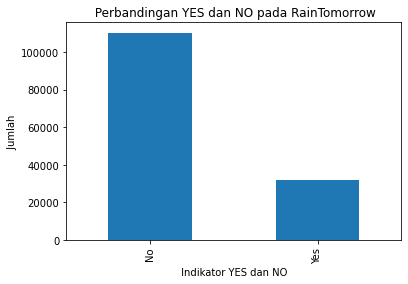

In [25]:
df["RainTomorrow"].value_counts().plot(kind="bar")
plt.title(" Perbandingan YES dan NO pada RainTomorrow")
plt.xlabel(" Indikator YES dan NO ")
plt.ylabel(" Jumlah ")
print(df["RainTomorrow"].value_counts())

_Keterangan_

BarChart diatas menunjukan hasil perbandingan nilai YES dan NO pada kolom RainTomorrow

### Kesimpulan dari analisis Target RainTomorrow

_Kesimpulan_

Hasil dari BarChart diatas menunjukkan, Hasil "NO" ada pada angka 110.316 dan "YES" ada pada angka 31.877. Dari hasil BarChart diatas menunjukan bahwa jumlah hasil prediksi "NO" menghasilkan angka yang sangat tinggi sekali.Hasil ini membuktikan bahwa hasil nilai"NO" lebih mendominasi dari pada nilai "YES" dan jumlah selisihnya sangat jauh. Hasil Dari "YES" dan "NO" ini harus dilakukan balancing data. Jikalau tidak dilakukan _Balancing_ data, Model akan cenderung memprediksi kelas mayoritas karena data mayoritas memiliki lebih banyak sampel daripada data minoritas.

## Lokasi dengan RainTomorrow

### Analsis berdasarkan Kota

Kita akan melihat perbandingan Yes dan No pada Setiap Lokasi yang ada

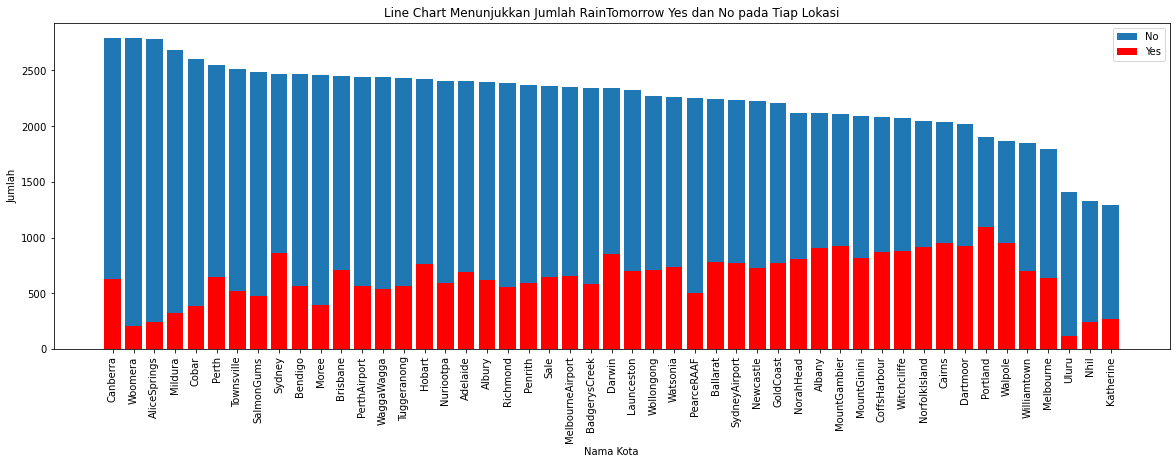

In [26]:
# Hitung jumlah kejadian "RainTomorrow" yang sama dengan "Yes" untuk setiap lokasi
df_rain_tomorrow_yes = df.loc[df['RainTomorrow']=='Yes'].groupby('Location')['RainTomorrow'].count().reset_index(name='Yes')
df_rain_tomorrow_yes = df_rain_tomorrow_yes.sort_values(by='Yes', ascending=False)

df_rain_tomorrow_no = df.loc[df["RainTomorrow"]=="No"].groupby("Location")["RainTomorrow"].value_counts().reset_index(name="No")
df_rain_tomorrow_no = df_rain_tomorrow_no.sort_values(by="No", ascending=False)

# Buat figure dengan ukuran 10 x 6 inci
fig, ax = plt.subplots(figsize=(20, 6))


# Buat line chart untuk jumlah No
ax.bar(df_rain_tomorrow_no['Location'], df_rain_tomorrow_no['No'], label='No')

# Buat line chart untuk jumlah Yes
ax.bar(df_rain_tomorrow_yes['Location'], df_rain_tomorrow_yes['Yes'], label='Yes',color='red')



# Atur judul, label sumbu-x dan sumbu-y
ax.set_title('Line Chart Menunjukkan Jumlah RainTomorrow Yes dan No pada Tiap Lokasi')
ax.set_xlabel('Nama Kota')
ax.set_ylabel('Jumlah')

# Atur label untuk setiap line chart
ax.legend()

# Putar label sumbu-x supaya mudah dibaca
plt.xticks(rotation=90)

# Tampilkan plot
plt.show()


_Keterangan_ :

Bar diatas menunjukan jumlah "YES" dan "NO" untuk setiap daerah nya

Kita lihat yang lokasi kotanya bernilai YES saja

 Top 5 YES 
        Location   Yes
33      Portland  1095
8         Cairns   950
43       Walpole   949
12      Dartmoor   922
22  MountGambier   920


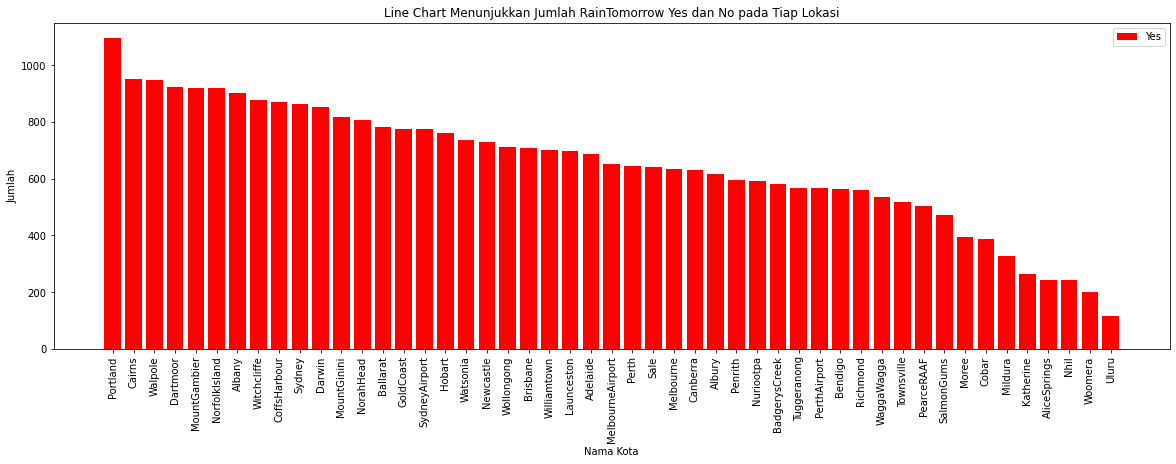

In [27]:
# Buat figure dengan ukuran 10 x 6 inci
fig, ax = plt.subplots(figsize=(20, 6))

# Buat line chart untuk jumlah Yes
ax.bar(df_rain_tomorrow_yes['Location'], df_rain_tomorrow_yes['Yes'], label='Yes',color='red')



# Atur judul, label sumbu-x dan sumbu-y
ax.set_title('Line Chart Menunjukkan Jumlah RainTomorrow Yes dan No pada Tiap Lokasi')
ax.set_xlabel('Nama Kota')
ax.set_ylabel('Jumlah')

# Atur label untuk setiap line chart
ax.legend()

# Putar label sumbu-x supaya mudah dibaca
plt.xticks(rotation=90)

print(" Top 5 YES ")
print(df_rain_tomorrow_yes.head())
plt.show()

_Keterangan_ :

Bar diatas menunjukan jumlah "YES" untuk setiap daerah nya

Kita lihat yang lokasi kotanya bernilai No saja

 Top 5 NO 
        Location RainTomorrow    No
9       Canberra           No  2789
48       Woomera           No  2788
3   AliceSprings           No  2787
20       Mildura           No  2680
10         Cobar           No  2602


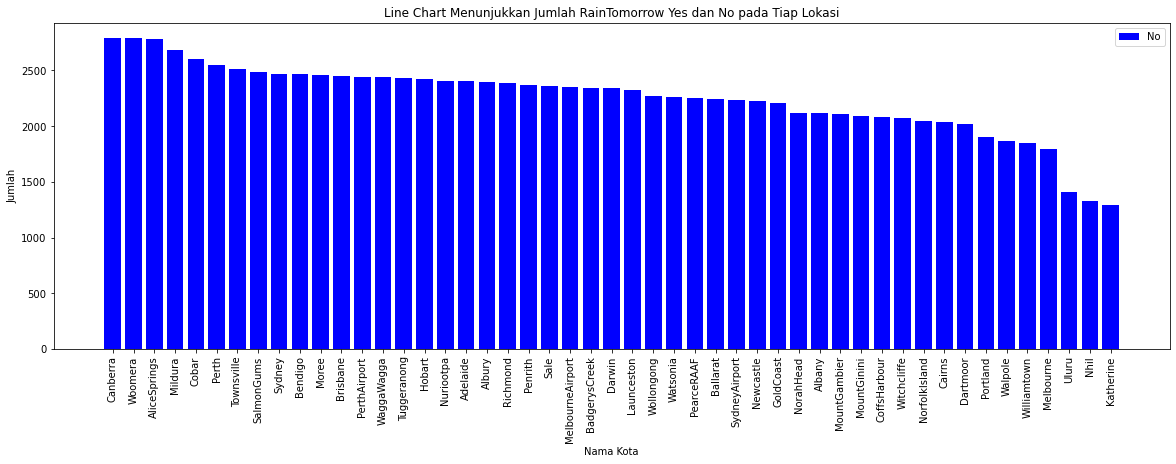

In [28]:
# Buat figure dengan ukuran 10 x 6 inci
fig, ax = plt.subplots(figsize=(20, 6))

# Buat line chart untuk jumlah Yes
ax.bar(df_rain_tomorrow_no['Location'], df_rain_tomorrow_no['No'], label='No',color='blue')



# Atur judul, label sumbu-x dan sumbu-y
ax.set_title('Line Chart Menunjukkan Jumlah RainTomorrow Yes dan No pada Tiap Lokasi')
ax.set_xlabel('Nama Kota')
ax.set_ylabel('Jumlah')

# Atur label untuk setiap line chart
ax.legend()

# Putar label sumbu-x supaya mudah dibaca
plt.xticks(rotation=90)

print(" Top 5 NO ")
print(df_rain_tomorrow_no.head())
plt.show()

_Keterangan_ :

Bar diatas menunjukan jumlah "NO" untuk setiap daerah nya

#### Kesimpulan Analisis berdasarkan kota

Hasil dari kesimpulan yang ada, setiap kota mempunyai nilai prediktor RainTomorrow "YES" dan "NO" yang berbeda-beda. Hasil dari data yang ada, kota kota nya berbeda antara bernilai Yes dan No. Hal ini menunjukkan bahwa kota dapat mempengaruhi hasil prediksi pada RainTomorrow

### Analsis berdasarkan daerah

Sekarang kita akan membandingkan berdasarkan daerah. Berikut List daerahnya

**New South Wales**:

>Albury, Badgerys Creek, Cobar, CoffsHarbour, Newcastle, Norah Head, Penrith, Richmond, Sydney, SydneyAirport, WaggaWagga, Williamtown, Wollongong.

**Australian Capital Territory**: 
> Canberra, Tuggeranong

**Victoria**:
>Ballarat, Bendigo, Sale, MelbourneAirport, Melbourne, Mildura, Nhil, Portland, Watsonia, Dartmoor

**Queensland**:
>Brisbane, Cairns, GoldCoast, Townsville

**South Australia**:
>Adelaide, MountGambier, Nuriootpa, Woomera.

**Western Australia**:
>Albany, Witchcliffe, PearceRAAF, PerthAirport, Perth, SalmonGums, Walpole

**Tasmania**:
>Hobart, Launceston

**Northern Territory**:
>AliceSprings, Darwin, Katherine, Uluru

Sekarang mari kita buat kolom barunya

In [29]:
df_provinsi=df.loc[:,["Location","RainTomorrow"]]
df_provinsi.head()

,Location,RainTomorrow
0,Albury,No
1,Albury,No
2,Albury,No
3,Albury,No
4,Albury,No


RainTomorrow
No     25329
Yes     7347
dtype: int64

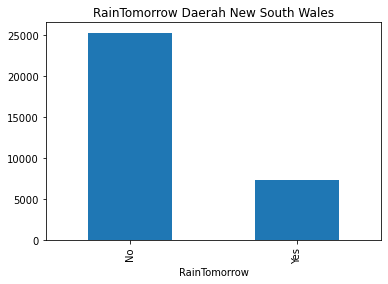

In [30]:
# Filter data untuk New_South_Wales
df_New_South_Wales = df_provinsi.loc[(df_provinsi['Location'] == 'Albury') | (df_provinsi['Location'] == 'Badgerys Creek') 
                                     | (df_provinsi['Location'] == 'Cobar')| (df_provinsi['Location'] == 'CoffsHarbour')
                                     | (df_provinsi['Location'] == 'Newcastle')| (df_provinsi['Location'] == 'Norah Head')
                                     | (df_provinsi['Location'] == 'Penrith')| (df_provinsi['Location'] == 'Richmond')
                                     | (df_provinsi['Location'] == 'Sydney')| (df_provinsi['Location'] == 'SydneyAirport')
                                     | (df_provinsi['Location'] == 'WaggaWagga')| (df_provinsi['Location'] == 'Williamtown')
                                     | (df_provinsi['Location'] == 'Wollongong')]

# Buat tabel pivot
df_pivot_New_South_Wales = df_New_South_Wales.pivot_table(index='Location', columns='RainTomorrow', aggfunc='size', fill_value=0)

# Tampilkan tabel pivot
a = df_pivot_New_South_Wales.sum()
df_pivot_New_South_Wales.sum().plot(kind='bar')
plt.title("RainTomorrow Daerah New South Wales")
a

_keterangan_:

Grafik yang menunjukkan RainTomorrow dari Daerah New South Wales

RainTomorrow
No     5219
Yes    1197
dtype: int64

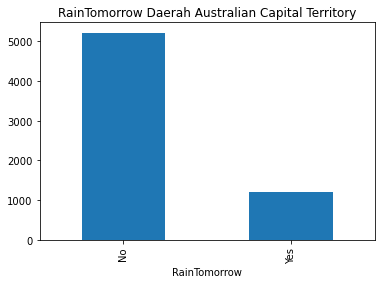

In [31]:
# Filter data untuk 
df_Australian_Capital_Territory = df_provinsi.loc[(df_provinsi['Location'] == 'Canberra') | (df_provinsi['Location'] == 'Tuggeranong')]

# Buat tabel pivot
df_pivot_Australian_Capital_Territory = df_Australian_Capital_Territory.pivot_table(index='Location', columns='RainTomorrow', aggfunc='size', fill_value=0)

# Tampilkan tabel pivot
b = df_pivot_Australian_Capital_Territory.sum()
df_pivot_Australian_Capital_Territory.sum().plot(kind='bar')
plt.title("RainTomorrow Daerah Australian Capital Territory")
b

_keterangan_:

Grafik yang menunjukkan RainTomorrow dari Daerah Australian Capital Territory

RainTomorrow
No     21421
Yes     6599
dtype: int64

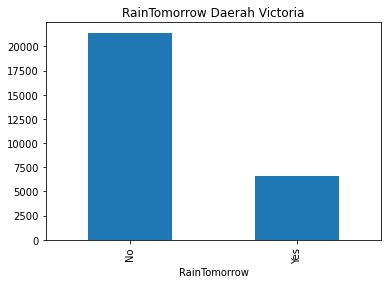

In [32]:
# Filter data untuk Australian_Capital_Territory
df_Victoria = df_provinsi.loc[(df_provinsi['Location'] == 'Ballarat') | (df_provinsi['Location'] == 'Bendigo')
                             | (df_provinsi['Location'] == 'Sale')| (df_provinsi['Location'] == 'MelbourneAirport')
                             | (df_provinsi['Location'] == 'Melbourne')| (df_provinsi['Location'] == 'Mildura')
                             | (df_provinsi['Location'] == 'Nhil')| (df_provinsi['Location'] == 'Portland')
                             | (df_provinsi['Location'] == 'Watsonia')| (df_provinsi['Location'] == 'Dartmoor')]

# Buat tabel pivot
df_pivot_Victoria = df_Victoria.pivot_table(index='Location', columns='RainTomorrow', aggfunc='size', fill_value=0)

# Tampilkan tabel pivot
c = df_pivot_Victoria.sum()
df_pivot_Victoria.sum().plot(kind='bar')
plt.title("RainTomorrow Daerah Victoria")
c

_keterangan_:

Grafik yang menunjukkan RainTomorrow dari Daerah Victoria

RainTomorrow
No     9209
Yes    2953
dtype: int64

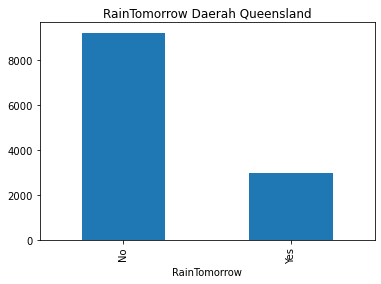

In [33]:
# Filter data untuk Australian_Capital_Territory
df_Queensland = df_provinsi.loc[(df_provinsi['Location'] == 'Brisbane') | (df_provinsi['Location'] == 'Cairns')
                             | (df_provinsi['Location'] == 'GoldCoast')| (df_provinsi['Location'] == 'Townsville')]

# Buat tabel pivot
df_pivot_Queensland = df_Queensland.pivot_table(index='Location', columns='RainTomorrow', aggfunc='size', fill_value=0)

# Tampilkan tabel pivot
d = df_pivot_Queensland.sum()
df_pivot_Queensland.sum().plot(kind='bar')
plt.title("RainTomorrow Daerah Queensland")
d

_keterangan_:

Grafik yang menunjukkan RainTomorrow dari Daerah Quesland

RainTomorrow
No     9710
Yes    2402
dtype: int64

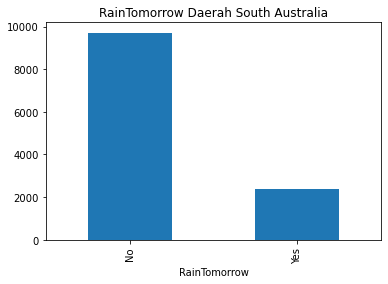

In [34]:
# Filter data untuk Australian_Capital_Territory
df_South_Australia = df_provinsi.loc[(df_provinsi['Location'] == 'Adelaide') | (df_provinsi['Location'] == 'MountGambier')
                             | (df_provinsi['Location'] == 'Nuriootpa')| (df_provinsi['Location'] == 'Woomera')]

# Buat tabel pivot
df_pivot_South_Australia = df_South_Australia.pivot_table(index='Location', columns='RainTomorrow', aggfunc='size', fill_value=0)

# Tampilkan tabel pivot
e = df_pivot_South_Australia.sum()
df_pivot_South_Australia.sum().plot(kind='bar')
plt.title("RainTomorrow Daerah South Australia")
e

_keterangan_:

Grafik yang menunjukkan RainTomorrow dari Daerah South Australia

RainTomorrow
No     15787
Yes     4919
dtype: int64

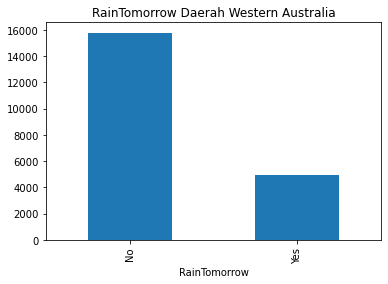

In [35]:
# Filter data untuk Australian_Capital_Territory
df_Western_Australia = df_provinsi.loc[(df_provinsi['Location'] == 'Albany') | (df_provinsi['Location'] == 'Witchcliffe')
                             | (df_provinsi['Location'] == 'PearceRAAF')| (df_provinsi['Location'] == 'PerthAirport')
                            | (df_provinsi['Location'] == 'Perth')| (df_provinsi['Location'] == 'SalmonGums')
                            | (df_provinsi['Location'] == 'Walpole')]

# Buat tabel pivot
df_pivot_Western_Australia = df_Western_Australia.pivot_table(index='Location', columns='RainTomorrow', aggfunc='size', fill_value=0)

# Tampilkan tabel pivot
f = df_pivot_Western_Australia.sum()
df_pivot_Western_Australia.sum().plot(kind='bar')
plt.title("RainTomorrow Daerah Western Australia")
f

_keterangan_:

Grafik yang menunjukkan RainTomorrow dari Daerah Western Australia

RainTomorrow
No     4756
Yes    1460
dtype: int64

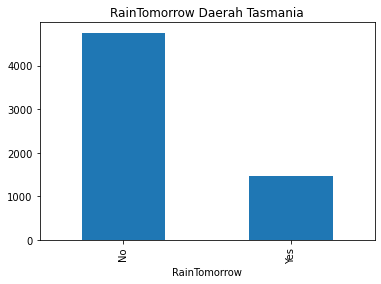

In [36]:
# Filter data untuk Australian_Capital_Territory
df_Tasmania = df_provinsi.loc[(df_provinsi['Location'] == 'Hobart') | (df_provinsi['Location'] == 'Launceston')]

# Buat tabel pivot
df_pivot_Tasmania = df_Tasmania.pivot_table(index='Location', columns='RainTomorrow', aggfunc='size', fill_value=0)

# Tampilkan tabel pivot
g = df_pivot_Tasmania.sum()
df_pivot_Tasmania.sum().plot(kind='bar')
plt.title("RainTomorrow Daerah Tasmania")
g

_keterangan_:

Grafik yang menunjukkan RainTomorrow dari Daerah Tasmania

RainTomorrow
No     21421
Yes     6599
dtype: int64

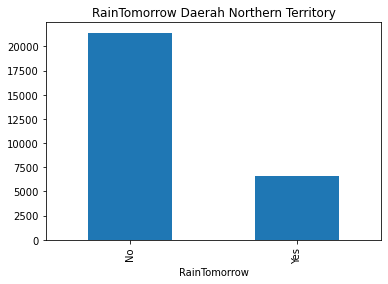

In [37]:
# Filter data untuk Australian_Capital_Territory
df_Northern_Territory = df_provinsi.loc[(df_provinsi['Location'] == 'Ballarat') | (df_provinsi['Location'] == 'Bendigo')
                             | (df_provinsi['Location'] == 'Sale')| (df_provinsi['Location'] == 'MelbourneAirport')
                             | (df_provinsi['Location'] == 'Melbourne')| (df_provinsi['Location'] == 'Mildura')
                             | (df_provinsi['Location'] == 'Nhil')| (df_provinsi['Location'] == 'Portland')
                             | (df_provinsi['Location'] == 'Watsonia')| (df_provinsi['Location'] == 'Dartmoor')]

# Buat tabel pivot
df_pivot_Northern_Territory = df_Northern_Territory.pivot_table(index='Location', columns='RainTomorrow', aggfunc='size', fill_value=0)

# Tampilkan tabel pivot
h = df_pivot_Northern_Territory.sum()
df_pivot_Northern_Territory.sum().plot(kind='bar')
plt.title("RainTomorrow Daerah Northern Territory")
h

_keterangan_:

Grafik yang menunjukkan RainTomorrow dari Daerah Northern Territory

Membuat Dataframe baru unbtuk melihat perbadningnya dalam grafik

In [38]:
dataFrame_provinsi = pd.DataFrame({"Provinsi_New_South_Wales":a,
                                  "Provinsi_Australian_Capital_Territory":b,
                                  "Provinsi_Victoria":c,
                                  "Provinsi_Quessland":d,
                                  "Provinsi_South_Australia":e,
                                  "Provinsi_Western_Australia":f,
                                  "Provinsi_Tasmania":g,
                                  "Provinsi_Northen_teority":h
                                  })

In [39]:
dataFrame_provinsi.index.name=None
dataFrame_provinsi

,Provinsi_New_South_Wales,Provinsi_Australian_Capital_Territory,Provinsi_Victoria,Provinsi_Quessland,Provinsi_South_Australia,Provinsi_Western_Australia,Provinsi_Tasmania,Provinsi_Northen_teority
No,25329,5219,21421,9209,9710,15787,4756,21421
Yes,7347,1197,6599,2953,2402,4919,1460,6599


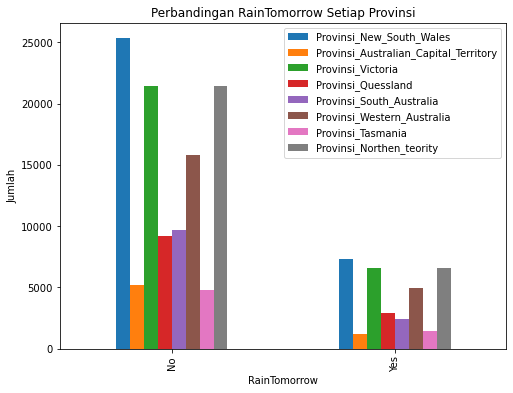

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))
dataFrame_provinsi.plot.bar(ax=ax)

# konfigurasi plot
ax.set_title('Perbandingan RainTomorrow Setiap Provinsi')
ax.set_xlabel('RainTomorrow')
ax.set_ylabel('Jumlah')
plt.show()

_Keterangan_

Menampilakn perbandingan RainTomorrow pada setiap Provinsi

#### Kesimpulan Analisis berdasarkan Daerah

Hasil dari barchart diatas menunjukan bahwa, setiap daerah di Australia mempunyai Raintomorrow yang berbeda beda. Alhasil menunjukan nilai YES dan NO yang berbeda beda seperti kota. Nantinya untuk lokasi akan kita ganti dengan daerah, karena jumlahnya lebih sedikit yakni dari 49 menjadi 8. Daerah bisa menjadi prediktor untuk Raintomorrow

## Perbandingan MinTemp MaxTemp dengan RainTomorrow

### Analisis Berdasarkan MinMaxTemp

Melihat MinMaxTemp dengan nilai Yes

In [41]:
MinMaxTemp_Rainfall = df[["MinTemp","MaxTemp","RainTomorrow"]]
MinMaxTemp_Rainfall[MinMaxTemp_Rainfall["RainTomorrow"]=="Yes"].sort_values(by="MaxTemp", ascending=False).head()

,MinTemp,MaxTemp,RainTomorrow
64228,18.8,46.8,Yes
34937,22.7,46.4,Yes
105884,24.3,44.9,Yes
107342,26.2,44.9,Yes
125558,13.7,44.5,Yes


_Keterangan_

Tabel diatas menunjukkan RainTomorrow yang memiliki NIlai YES dan diurutkan berdasarkan nilai tertinggi MaxTemp. Dari tabel yang ada bisa kita lihat MaxTemp dengan nilai diatas 40.0 memiliki output nilai RainTomorrow YES

In [42]:
MinMaxTemp_Rainfall = df[["MinTemp","MaxTemp","RainTomorrow"]]
MinMaxTemp_Rainfall[MinMaxTemp_Rainfall["RainTomorrow"]=="Yes"].sort_values(by="MinTemp", ascending=False).head()

,MinTemp,MaxTemp,RainTomorrow
98946,30.7,38.5,Yes
144900,30.2,39.5,Yes
70769,29.8,41.1,Yes
139638,29.7,32.3,Yes
144211,29.3,42.3,Yes


_Keterangan_

Dari tabel diatas menunjukan data data yang memiliki MinTemp terbesar yang RainTOmorrow memiliki nilai YES. Dapat kita lihat dalam tabel yang ada MinTemp yang mempunyai nilai diatas 29.

Melihat MinMaxTemp dengan nilai No

In [43]:
MinMaxTemp_Rainfall = df[["MinTemp","MaxTemp","RainTomorrow"]]
MinMaxTemp_Rainfall[MinMaxTemp_Rainfall["RainTomorrow"]=="No"].head().sort_values(by="MaxTemp", ascending=False).head()

,MinTemp,MaxTemp,RainTomorrow
4,17.5,32.3,No
3,9.2,28.0,No
2,12.9,25.7,No
1,7.4,25.1,No
0,13.4,22.9,No


_Keterangan_

Dari Tabel diatas menunjukan hasil prediksi NO dengan MAxTemp mempunyai nilai dibawah 33.0

In [44]:
MinMaxTemp_Rainfall = df[["MinTemp","MaxTemp","RainTomorrow"]]
MinMaxTemp_Rainfall[MinMaxTemp_Rainfall["RainTomorrow"]=="No"].head().sort_values(by="MinTemp", ascending=False).head()

,MinTemp,MaxTemp,RainTomorrow
4,17.5,32.3,No
0,13.4,22.9,No
2,12.9,25.7,No
3,9.2,28.0,No
1,7.4,25.1,No


_Keterangan_

Dari tabel diatas menunjukan data data yang memiliki MinTemp dibawah 18.0. yang emmiliki nilai RainTomorrow No

Melihat rata rata Dari MinMaxTemp

In [45]:
df.groupby("RainTomorrow")[["MinTemp","MaxTemp"]].mean()

,MinTemp,MaxTemp
RainTomorrow,,
No,11.898884,23.834771
Yes,13.181398,21.122737


Text(0.5, 1.0, 'Hubungan MinMaxTemperature dengan RainTomorrow')

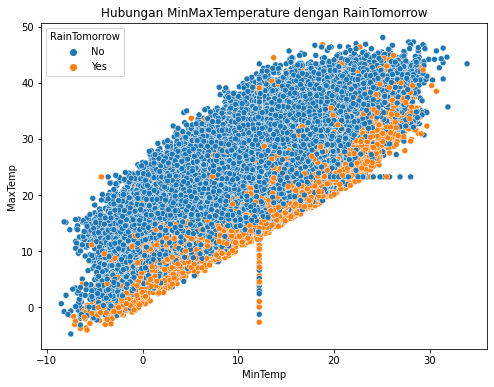

In [46]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="MinTemp", y="MaxTemp", hue = "RainTomorrow", data=df)
plt.title("Hubungan MinMaxTemperature dengan RainTomorrow")

_Keterangan_

Dari Scater plot diatas menunjukan keterangan nilai Min dan Max temperature yang menghasilkan prediksi  RainTomorrow Yes dan No

#### Kesimpulan Analisis Perbandingan Min Max Temp dengan Rainfall

Hasil dari kesimpulan scater plot dan tabel diatas menunjukan, hasilnya MinTemp dan MaxTemp mempunyai pengaruh yang sangat kuat pada hasil prediksi rainTomorrow. BIsa kita lihat pada scatter plot yang ada, persebarannya menampakan titik MinTemp dan MaxTemp yang ada menhasilkan nilai RainTomorrow. Dari hasil ini, menunjukkan bahwa MinTemp dan MaxTemp dapat mempengaruhi feature kolom Raintomorrow

### Korelasi MinMaxTemp dengan RainTomorrow

Sebelum melakukan korelasi, mari kita ubah raintomorrow menjadi bernilai 1 dan 0 dengan label Encoder

In [47]:
label_encoder = preprocessing.LabelEncoder()
df['RainTomorrow']= label_encoder.fit_transform(df['RainTomorrow'])

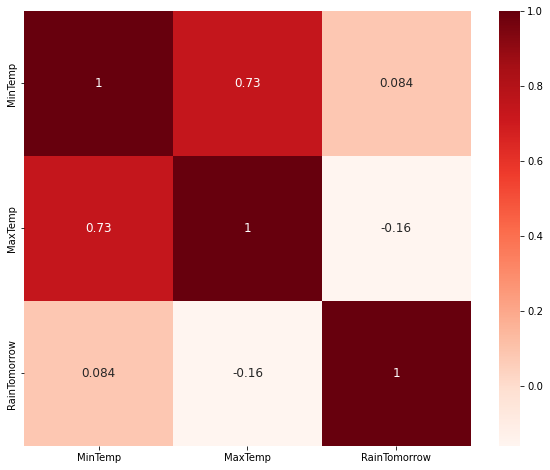

In [48]:
cols = ["MinTemp","MaxTemp","RainTomorrow"]
matriksKorelasiMM = df[cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(matriksKorelasiMM, cmap='Reds', annot=True, annot_kws={'fontsize':12})
plt.show()

_Keterangan_

Korelasi antar variabel MinMaxTemp denganRainTomorrow

#### Kesimpulan Analisis Terhadap RainTomorrow dari MinMaxTemp

Korelasi antara MaxTemp dan RainTomorrow sangat lemah, sedangkan korelasi antara MinTemp dan RainTomorrow lemah namun mengindikasikan adanya pengaruh negatif yang sangat lemah. Akan tetapi kedua data ini mempunyai korelasi yang kuat antar variabel independennya. Maka dari itu kita akan tetap menggunakan kolom ini dikarenakan prediksi untuk RainTomorrow juga berdasarkan temperatur

## Perbandingan anatara RainToday dengan RainTomorrow

### Analsis RainToday dengan Tomorrow

In [49]:
df["RainToday"].value_counts()

No     110738
Yes     31455
Name: RainToday, dtype: int64

_Keterangan_

Menampilkan jumlah frekuensi dari YES NO kolom RainToday

In [50]:
df["RainTomorrow"].value_counts()

0    110316
1     31877
Name: RainTomorrow, dtype: int64

_Keterangan_

Menampilkan jumlah frekuensi dari YES NO kolom RainTomorrow

In [51]:
df.groupby("RainToday")["RainTomorrow"].value_counts()

RainToday  RainTomorrow
No         0               93458
           1               17280
Yes        0               16858
           1               14597
Name: RainTomorrow, dtype: int64

_Keterangan_

Menampilkan jumlah frekuensi dari YES NO kolom RainToday dengan RainTomorrow

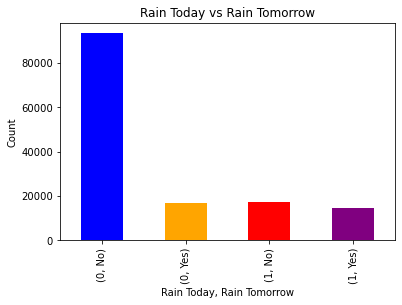

In [52]:
# Plot bar chart
plot = df.groupby("RainTomorrow")["RainToday"].value_counts().plot(kind="bar", color=['blue', 'orange',"red","purple"])

# Set judul dan label sumbu x dan y
plot.set_title("Rain Today vs Rain Tomorrow")
plot.set_xlabel("Rain Today, Rain Tomorrow")
plot.set_ylabel("Count")

#menampilkan
plt.show()

_Keterangan_

Menampilkan diagram Raintoday dengan raintomorrow

#### Kesimpulan Perbandingan antara RainToday dengan Raintomorrow

Kesimpulan dari data diatas antara raintoday dan raintomorrow, Ketika rainToday memiliki nilai NO, hasil untuk nilai raintomorrow YES dan NO sangat berbeda jauh. Hal ini dapat dikatakan bahwa RainToday bisa jadi salah satu prediktor untuk  memprediksi rainTomorrow

### Korelasi RainFall dengan RainTomorrow

Sebelum melihat korelasi yang ada, mari kita ubah RainToday menjadi bernilai 1 dan 0

In [53]:
df["RainToday"]=label_encoder.fit_transform(df["RainToday"])

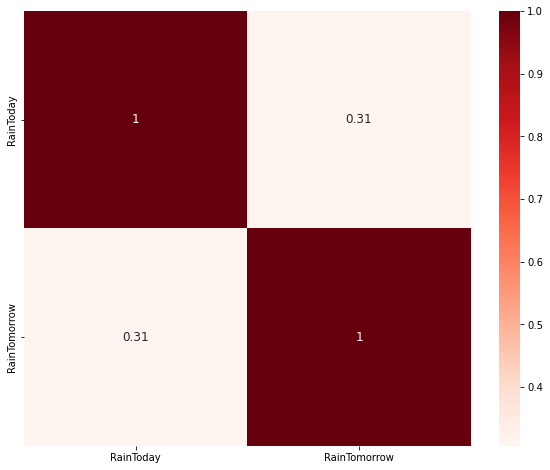

In [54]:
cols = ["RainToday","RainTomorrow"]
matriksKorelasiMM = df[cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(matriksKorelasiMM, cmap='Reds', annot=True, annot_kws={'fontsize':12})
plt.show()

_Keteragan_

Heatmap korelasi antara RainToday dengan RainTomorrow

#### Kesimpulan Korelasi RainToday dan RainTomorrow

Dengan korelasi antara "RainToday" dan "RainTomorrow" sebesar 0,31, kita dapat menyimpulkan bahwa ada korelasi positif yang sedang antara kedua variabel ini. Artinya, jika "RainToday" mengalami kenaikan, kemungkinan "RainTomorrow" juga akan meningkat. Kolom RainToday akan menjadi prediktor untuk RainTomorrow

## Perbandingan Wind dengan RainTomorrow

### Mengubah nilai Arah Mata angin dengan derajat

In [55]:
columns_wind = df[["WindGustDir",'WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm']]

In [56]:
columns_wind.head()

,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm
0,W,44.0,W,WNW,20.0,24.0
1,WNW,44.0,NNW,WSW,4.0,22.0
2,WSW,46.0,W,WSW,19.0,26.0
3,NE,24.0,SE,E,11.0,9.0
4,W,41.0,ENE,NW,7.0,20.0


In [57]:
directions = {'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 
              'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5, 
              'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 
              'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5}

#pada df asli
df['WindGustDir'] = df['WindGustDir'].map(directions)
df['WindDir9am'] = df['WindDir9am'].map(directions)
df['WindDir3pm'] = df['WindDir3pm'].map(directions)

In [58]:
columns_wind.head()

,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm
0,W,44.0,W,WNW,20.0,24.0
1,WNW,44.0,NNW,WSW,4.0,22.0
2,WSW,46.0,W,WSW,19.0,26.0
3,NE,24.0,SE,E,11.0,9.0
4,W,41.0,ENE,NW,7.0,20.0


### Heat Map Wind

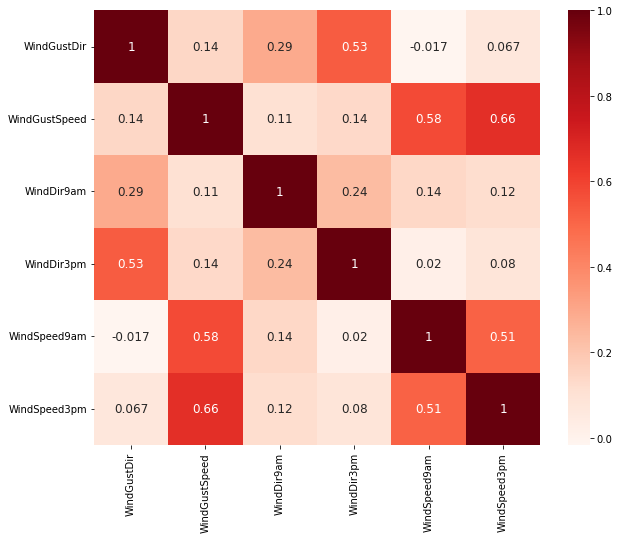

In [59]:
cols = ["WindGustDir",'WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm']
matriksKorelasiMM = df[cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(matriksKorelasiMM, cmap='Reds', annot=True, annot_kws={'fontsize':12})
plt.show()

_keterangan_


Korelasi Antar kolom Wind dengan RainTomorow.

#### Kesimpulan Korelasi Wind Ddengan RainTomorrow

Hasil kesimpulan korelasi diatas, menunjukan semua kolom berkorelasi kuat dengan RainTomorrow. Akan tetapi ada beberapa kolom independen yang mempuynai korelasi yang bisa dibilang sama kuatnya. Hal ini bisa mempengaruhi model. Kita akan menggunakan salah satu dari korelasi tersebut. Korelasi independen yang sama kuat adalah 
1. Windspeed9am dengan Windspeed3pm
2. Windspeed9am dengan WindGustSpeed
3. Windspeed3am dengan WindGustSpeed

disini kita akan menghapus Windgustspeed9am. Karena korelasinya lebih rendah dari pada windspeed3pm dengan WindGustSpeed

## Humidity dengan RainTOmorrow

### Heat Map Humidity

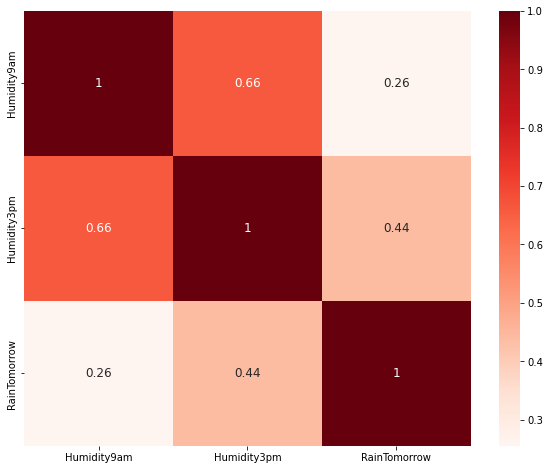

In [60]:
cols = ["Humidity9am","Humidity3pm","RainTomorrow"]
matriksKorelasiMM = df[cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(matriksKorelasiMM, cmap='Reds', annot=True, annot_kws={'fontsize':12})
plt.show()

_Keterangan_ :

Korelasi antara humidity dengan RainTomorrow

#### Kesimpulan Dari Heatmap

Kesimpulan dari data diatas menunjukan, hubungan antara variabel independen dengna dependen mempunyai nilai 0.26 dan 0.44. Akan tetapi untuk variabel independennya memiliki korelasi yang sama sama kuat. Maka dari itu kita akan mengambil nilai korelasi yang kuat dengan target 1 saja. Kita akan mengambil Humidity3pm sebagai prediktornya

## Pressure dengan RainTomorrow

### Heat map Pressure dengan RainTomorrow

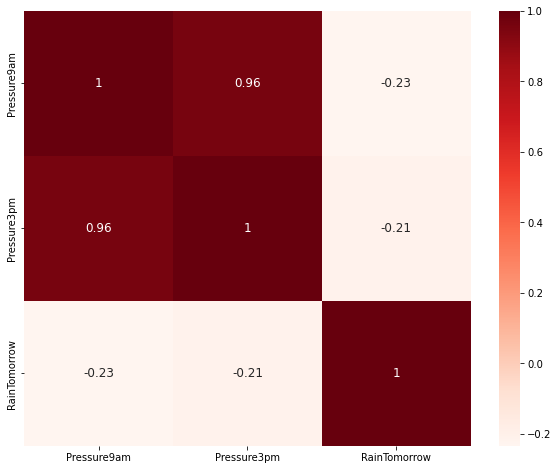

In [61]:
cols = ["Pressure9am","Pressure3pm","RainTomorrow"]
matriksKorelasiMM = df[cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(matriksKorelasiMM, cmap='Reds', annot=True, annot_kws={'fontsize':12})
plt.show()

#### Kesimpulan dari HeatMap

Kesimpulan dari heatmap diatas, variabel independen memiliki korelasi negatif dengan Raintomoorow. Akan tetapi sama halnya seperti Humidity. KOrelasi antar independenya sama sama kuat. Maka dari itu kita ambil salah satu yang korelasi dengan targetnya yang lebih kuat. Kita ambil Pressure3pm dengan korelasi -0.21 terhadap target untuk prediktornya

## Temp dengan RainTomorrow

### Heat Map Temp dengan Raintomorrow

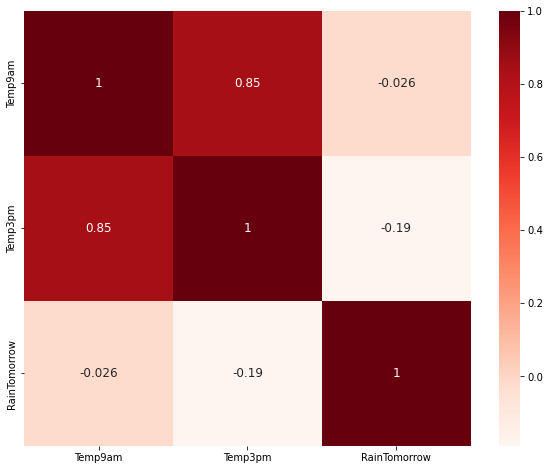

In [62]:
cols = ["Temp9am","Temp3pm","RainTomorrow"]
matriksKorelasiMM = df[cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(matriksKorelasiMM, cmap='Reds', annot=True, annot_kws={'fontsize':12})
plt.show()

#### Kesimpulan dari HeatMap TEmp dengan RainTomorrow

Kesimpulan dari Korelasi diatas, sama seperti sebebelumnya, memiliki korelasi yang antar independen yang sama kuat yaitu 0.85. Tapi disini terlihat jelas bahwa Temp9am korelasinya sangat rendah dengan RainTomorrow. Maka dari itu kita mengambil Temp3pm untuk Cariabel Prediktornya

## Melihat MinMaxTemp, Temp dengan RainTomorrow

Dikarenakan ada kesamaan arti antara MinTemp, MaxTemp, dengan Temp. Mari kita lihat dalam korelasi HeatMap

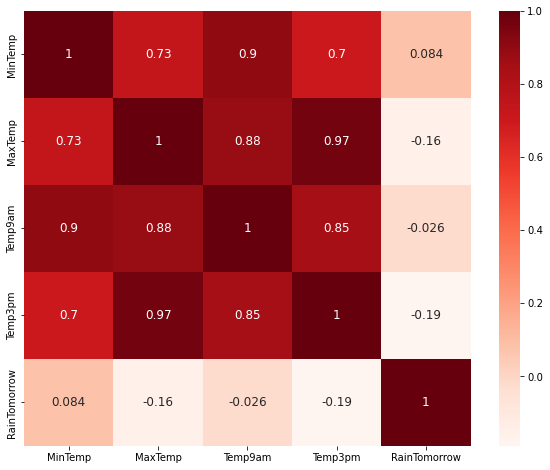

In [63]:
cols = ["MinTemp","MaxTemp","Temp9am","Temp3pm","RainTomorrow"]
matriksKorelasiMM = df[cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(matriksKorelasiMM, cmap='Reds', annot=True, annot_kws={'fontsize':12})
plt.show()

Seperti yang kita duga, korelasi antara variabel independen sangatlah kuat. Hal ini dapat menyebabkan redudansi. Kita akan mengambil korelasi yang kuat saja yaitu Temp3pm -0.19 yang memiliki korelasi negatif kuat dari pada lainnya.

## Melihat korelasi kolom terpilih (numerikal)

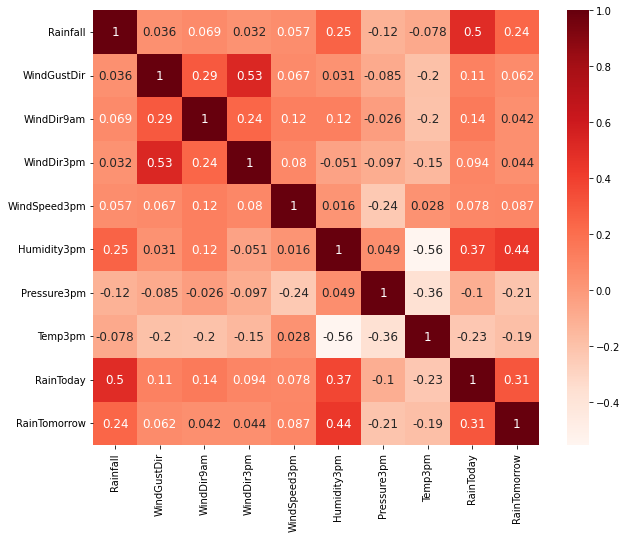

In [64]:
cols = ["Rainfall","WindGustDir","WindDir9am","WindDir3pm","WindSpeed3pm","Humidity3pm","Pressure3pm","Temp3pm","RainToday","RainTomorrow"]
matriksKorelasiMM = df[cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(matriksKorelasiMM, cmap='Reds', annot=True, annot_kws={'fontsize':12})
plt.show()

# PreProcesing Data

## Balancing Data

Dikarenakan Jumlah pada Target "NO" Sangatlah tinggi. Sekarang kita akan lakukan UnderSampling pada data yang ada.

In [65]:
countRT = df["RainTomorrow"].value_counts()
countRT

0    110316
1     31877
Name: RainTomorrow, dtype: int64

### UnderSampling

In [66]:
n = min(countRT)
n

31877

Setelah kita mendapatkan nilai N untuk nilai terkecil, skrg kita pisahkan YUes dan No untuk mendapatkan N yang sama

In [67]:
subset_yes = df[df['RainTomorrow'] == 1].sample(n=31877, random_state=42)
subset_no = df[df['RainTomorrow'] == 0].sample(n=31877, random_state=42)

In [68]:
new_df = pd.concat([subset_yes, subset_no])

In [69]:
new_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
126713,2017-02-27,SalmonGums,17.2,26.0,0.6,112.5,44.0,157.5,135.0,11.0,13.0,85.0,64.0,1017.653758,1015.258204,18.8,25.0,0,1
120998,2009-06-26,Perth,9.5,16.6,0.6,22.5,41.0,45.0,0.0,11.0,15.0,89.0,86.0,1009.100000,1004.700000,12.8,15.9,0,1
20516,2015-11-01,NorahHead,17.0,23.4,0.0,45.0,50.0,22.5,45.0,17.0,35.0,86.0,82.0,1015.700000,1010.900000,20.2,22.2,0,1
63805,2016-06-05,Sale,11.3,14.9,9.6,270.0,35.0,135.0,157.5,9.0,6.0,99.0,98.0,1007.000000,1003.000000,12.0,14.0,1,1
41951,2015-11-08,Williamtown,16.1,19.9,11.4,180.0,41.0,202.5,90.0,22.0,15.0,83.0,79.0,1019.900000,1019.600000,17.7,18.5,1,1


In [70]:
new_df["RainTomorrow"].value_counts()

1    31877
0    31877
Name: RainTomorrow, dtype: int64

In [71]:
new_df.shape

(63754, 19)

Proses Undersampling sudah selesai, jumlah data menjadi balance.

## Mengubah kolom location (kota) menjadi location(daerah)

### Pengubahan

Pada EDA Location terhadap RainTomorrow, kami membuat 2 versi, yarni berdasarkan kota dan satunya perdaerah. Untuk jumlah kotanya sendiri ada 49 kota dan itu sangatla banyak. Skrg kita akan ubah menjadi 4 kolom saja yang nantinya akan beriskan 1 dan 0 jika data tersebut ada di kota daerah tertentu

In [72]:
# Membuat dictionary yang berisi mapping antara kota dan provinsi
city_to_province = {
    'Albury': 'New South Wales',
    'Badgerys Creek': 'New South Wales',
    'Cobar': 'New South Wales',
    'Coffs Harbour': 'New South Wales',
    'Newcastle': 'New South Wales',
    'Norah Head': 'New South Wales',
    'Penrith': 'New South Wales',
    'Richmond': 'New South Wales',
    'Sydney': 'New South Wales',
    'SydneyAirport': 'New South Wales',
    'Wagga Wagga': 'New South Wales',
    'Williamtown': 'New South Wales',
    'Wollongong': 'New South Wales',
    'Canberra': 'Australian Capital Territory',
    'Tuggeranong': 'Australian Capital Territory',
    'Ballarat': 'Victoria',
    'Bendigo': 'Victoria',
    'Sale': 'Victoria',
    'MelbourneAirport': 'Victoria',
    'Melbourne': 'Victoria',
    'Mildura': 'Victoria',
    'Nhil': 'Victoria',
    'Portland': 'Victoria',
    'Watsonia': 'Victoria',
    'Dartmoor': 'Victoria',
    'Brisbane': 'Queensland',
    'Cairns': 'Queensland',
    'GoldCoast': 'Queensland',
    'Townsville': 'Queensland',
    'Adelaide': 'South Australia',
    'MountGambier': 'South Australia',
    'Nuriootpa': 'South Australia',
    'Woomera': 'South Australia',
    'Albany': 'Western Australia',
    'Witchcliffe': 'Western Australia',
    'PearceRAAF': 'Western Australia',
    'PerthAirport': 'Western Australia',
    'Perth': 'Western Australia',
    'SalmonGums': 'Western Australia',
    'Walpole': 'Western Australia',
    'Hobart': 'Tasmania',
    'Launceston': 'Tasmania',
    'Darwin': 'Northern Territory',
    'Katherine': 'Northern Territory',
    'Uluru': 'Northern Territory'
}

# Menambahkan kolom 'Location_Province' berdasarkan mapping dari dictionary
new_df['Location_Province'] = new_df['Location'].map(city_to_province)

# Melakukan One-Hot Encoding pada kolom 'location_province'
df_encoded = pd.get_dummies(new_df['Location_Province'])

# Menggabungkan kolom-kolom yang merepresentasikan provinsi yang sama
df_encoded['New South Wales'] = df_encoded[['New South Wales', 'Australian Capital Territory']].max(axis=1)
df_encoded['Victoria'] = df_encoded[['Victoria', 'Northern Territory']].max(axis=1)

# Menggabungkan DataFrame hasil One-Hot Encoding dengan DataFrame awal
new_df = pd.concat([new_df, df_encoded], axis=1)

# Menghapus kolom 'Location_Province' dan 'Location' yang tidak diperlukan
new_df.drop(['Location_Province', 'Location'], axis=1, inplace=True)

In [73]:
new_df.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Australian Capital Territory,New South Wales,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia
126713,2017-02-27,17.2,26.0,0.6,112.5,44.0,157.5,135.0,11.0,13.0,85.0,64.0,1017.653758,1015.258204,18.8,25.0,0,1,0,0,0,0,0,0,0,1
120998,2009-06-26,9.5,16.6,0.6,22.5,41.0,45.0,0.0,11.0,15.0,89.0,86.0,1009.100000,1004.700000,12.8,15.9,0,1,0,0,0,0,0,0,0,1
20516,2015-11-01,17.0,23.4,0.0,45.0,50.0,22.5,45.0,17.0,35.0,86.0,82.0,1015.700000,1010.900000,20.2,22.2,0,1,0,0,0,0,0,0,0,0
63805,2016-06-05,11.3,14.9,9.6,270.0,35.0,135.0,157.5,9.0,6.0,99.0,98.0,1007.000000,1003.000000,12.0,14.0,1,1,0,0,0,0,0,0,1,0
41951,2015-11-08,16.1,19.9,11.4,180.0,41.0,202.5,90.0,22.0,15.0,83.0,79.0,1019.900000,1019.600000,17.7,18.5,1,1,0,1,0,0,0,0,0,0


## Drop Kolom yang tidak dibutuhkan

In [74]:
df_model=new_df.loc[:,["Rainfall","WindGustDir","WindDir9am","WindDir3pm","WindSpeed3pm","Humidity3pm","Pressure3pm","Temp3pm","RainToday","RainTomorrow","Australian Capital Territory","Northern Territory","Queensland","South Australia","Tasmania","Victoria","Western Australia"]]


In [75]:
df_model.head()

,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed3pm,Humidity3pm,Pressure3pm,Temp3pm,RainToday,RainTomorrow,Australian Capital Territory,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia
126713,0.6,112.5,157.5,135.0,13.0,64.0,1015.258204,25.0,0,1,0,0,0,0,0,0,1
120998,0.6,22.5,45.0,0.0,15.0,86.0,1004.700000,15.9,0,1,0,0,0,0,0,0,1
20516,0.0,45.0,22.5,45.0,35.0,82.0,1010.900000,22.2,0,1,0,0,0,0,0,0,0
63805,9.6,270.0,135.0,157.5,6.0,98.0,1003.000000,14.0,1,1,0,0,0,0,0,1,0
41951,11.4,180.0,202.5,90.0,15.0,79.0,1019.600000,18.5,1,1,0,0,0,0,0,0,0


## Standart Scaler data

In [76]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63754 entries, 126713 to 652
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rainfall                      63754 non-null  float64
 1   WindGustDir                   63754 non-null  float64
 2   WindDir9am                    63754 non-null  float64
 3   WindDir3pm                    63754 non-null  float64
 4   WindSpeed3pm                  63754 non-null  float64
 5   Humidity3pm                   63754 non-null  float64
 6   Pressure3pm                   63754 non-null  float64
 7   Temp3pm                       63754 non-null  float64
 8   RainToday                     63754 non-null  int32  
 9   RainTomorrow                  63754 non-null  int32  
 10  Australian Capital Territory  63754 non-null  uint8  
 11  Northern Territory            63754 non-null  uint8  
 12  Queensland                    63754 non-null  uint8  
 13

In [77]:
scaler = StandardScaler()

In [78]:
from sklearn.preprocessing import StandardScaler

# define the scaler
scaler = StandardScaler()

# fit and transform the data
df_model[['Rainfall', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'WindSpeed3pm', 'Humidity3pm', 'Pressure3pm', 'Temp3pm']] = scaler.fit_transform(df_model[['Rainfall', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'WindSpeed3pm', 'Humidity3pm', 'Pressure3pm', 'Temp3pm']])


In [79]:
df_model.head()

,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed3pm,Humidity3pm,Pressure3pm,Temp3pm,RainToday,RainTomorrow,Australian Capital Territory,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia
126713,-0.280049,-0.666810,0.024063,-0.385469,-0.673233,0.301393,0.133609,0.611563,0,1,0,0,0,0,0,0,1
120998,-0.280049,-1.547500,-0.976534,-1.711813,-0.453624,1.323119,-1.391306,-0.712789,0,1,0,0,0,0,0,0,1
20516,-0.334569,-1.327327,-1.176654,-1.269698,1.742460,1.137350,-0.495844,0.204070,0,1,0,0,0,0,0,0,0
63805,0.537750,0.874398,-0.176056,-0.164411,-1.441862,1.880423,-1.636836,-0.989301,1,1,0,0,0,0,0,1,0
41951,0.701310,-0.006292,0.424302,-0.827583,-0.453624,0.998024,0.760692,-0.334402,1,1,0,0,0,0,0,0,0


## Remove Outlier

In [80]:
def remove_outlier(df_model):
    Q1 = df_model.quantile(0.25)
    Q3 = df_model.quantile(0.75)
    IQR = Q3 - Q1
    df_model = df_model[~((df_model < (Q1 - 1.5 * IQR)) | (df_model > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_model

In [81]:
# panggil fungsi remove_outlier untuk semua kolom dalam df
remove_outlier(df_model)
df_model.head()

,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed3pm,Humidity3pm,Pressure3pm,Temp3pm,RainToday,RainTomorrow,Australian Capital Territory,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia
126713,-0.280049,-0.666810,0.024063,-0.385469,-0.673233,0.301393,0.133609,0.611563,0,1,0,0,0,0,0,0,1
120998,-0.280049,-1.547500,-0.976534,-1.711813,-0.453624,1.323119,-1.391306,-0.712789,0,1,0,0,0,0,0,0,1
20516,-0.334569,-1.327327,-1.176654,-1.269698,1.742460,1.137350,-0.495844,0.204070,0,1,0,0,0,0,0,0,0
63805,0.537750,0.874398,-0.176056,-0.164411,-1.441862,1.880423,-1.636836,-0.989301,1,1,0,0,0,0,0,1,0
41951,0.701310,-0.006292,0.424302,-0.827583,-0.453624,0.998024,0.760692,-0.334402,1,1,0,0,0,0,0,0,0


# Pendefisian Model

In [82]:
lr = LogisticRegression()
svc = SVC()

# Pelatihan Model

In [83]:
x1 = df_model.drop(['RainTomorrow',"Rainfall"], axis = 1)
y1 = df_model['RainTomorrow']
# Memisahkan data menjadi data training dan data testing
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1 ,y1, test_size = 0.2)
lr = LogisticRegression(penalty='l2', C=1 )
lr.fit(x_train1,y_train1)
predictionlr = lr.predict(x_test1)

In [84]:
x2 = df_model.drop(['RainTomorrow'], axis = 1)
y2 = df_model['RainTomorrow']
# Memisahkan data menjadi data training dan data testing
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2, test_size = 0.2)
svc=SVC(degree=4, gamma =0.5)
svc.fit(x_train2,y_train2)
predictionsvc = svc.predict(x_test2)

# Evaluasi Model

In [85]:
print(confusion_matrix(y_test1, predictionlr))
print(classification_report(y_test1, predictionlr))
print(accuracy_score(y_test1, predictionlr))

[[4940 1454]
 [1645 4712]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      6394
           1       0.76      0.74      0.75      6357

    accuracy                           0.76     12751
   macro avg       0.76      0.76      0.76     12751
weighted avg       0.76      0.76      0.76     12751

0.7569602384126736


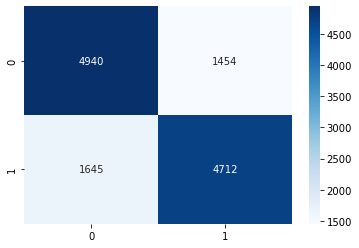

In [86]:
cm = confusion_matrix(y_test1, predictionlr)
cm_label = pd.DataFrame(cm, columns = np.unique(y_test1),
                        index = np.unique(y_test1))
sns.heatmap(cm_label, annot=True, cmap='Blues', fmt='g');

In [87]:
print(confusion_matrix(y_test2, predictionsvc))
print(classification_report(y_test2, predictionsvc))
print(accuracy_score(y_test2, predictionsvc))

[[5052 1335]
 [1425 4939]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      6387
           1       0.79      0.78      0.78      6364

    accuracy                           0.78     12751
   macro avg       0.78      0.78      0.78     12751
weighted avg       0.78      0.78      0.78     12751

0.7835463885185475


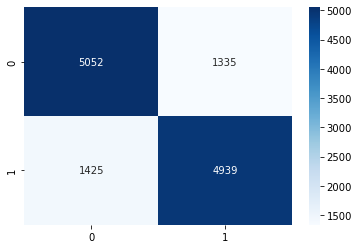

In [88]:
cm = confusion_matrix(y_test2, predictionsvc)
cm_label = pd.DataFrame(cm, columns = np.unique(y_test2),
                        index = np.unique(y_test2))
sns.heatmap(cm_label, annot=True, cmap='Blues', fmt='g');

In [89]:
#tentuin gamma svc
1/(17*x2.var())

Rainfall                        0.058823
WindGustDir                     0.058823
WindDir9am                      0.058823
WindDir3pm                      0.058823
WindSpeed3pm                    0.058823
Humidity3pm                     0.058823
Pressure3pm                     0.058823
Temp3pm                         0.058823
RainToday                       0.276971
Australian Capital Territory    1.431139
Northern Territory              1.459682
Queensland                      0.734161
South Australia                 0.785923
Tasmania                        1.407108
Victoria                        0.318814
Western Australia               0.465212
dtype: float64

In [90]:
1/(17*x2.var()).mean()

0.10693201203396303

# Model Inference

In [137]:
test1 = {'WindGustDir':[0.874398, 0.654225, -0.006292, -0.006292],
         'WindDir9am':[1.424899, -1.376773, -0.006292, -0.006292 ],
         'WindDir3pm':[-1.269698, -1.711813, -1.269698, -1.269698],
         'WindSpeed3pm':[1.754222, -1.890542, 1.303243, 3.024111],
         'Humidity3pm':[-0.605250, 1.976542, 1.521890, -0.912315],
         'Pressure3pm':[-0.243567, 0.689765, -0.234098, 3.245921],
         'Temp3pm':[0.890722, -0.128954, -2.784561, 2.784561],
         'RainToday':[0, 1, 1, 0],
         
         'Australian Capital Territory':[0, 1, 0, 1],
         'Northern Territory':[0, 0, 0, 0],
         'Queensland':[0, 0, 0, 0],
         'South Australia':[0, 0, 0, 0],
         'Tasmania':[0, 0, 0, 0],
         'Victoria':[1, 0, 1, 0],
         'Western Australia':[0, 0, 0, 0]}
test1 = pd.DataFrame(test1)
test1

,WindGustDir,WindDir9am,WindDir3pm,WindSpeed3pm,Humidity3pm,Pressure3pm,Temp3pm,RainToday,Australian Capital Territory,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia
0,0.874398,1.424899,-1.269698,1.754222,-0.605250,-0.243567,0.890722,0,0,0,0,0,0,1,0
1,0.654225,-1.376773,-1.711813,-1.890542,1.976542,0.689765,-0.128954,1,1,0,0,0,0,0,0
2,-0.006292,-0.006292,-1.269698,1.303243,1.521890,-0.234098,-2.784561,1,0,0,0,0,0,1,0
3,-0.006292,-0.006292,-1.269698,3.024111,-0.912315,3.245921,2.784561,0,1,0,0,0,0,0,0


In [138]:
pred1 = lr.predict(test1)
pred1

array([0, 1, 1, 0])

Pada test 1 dilihat prediksi hujan pada negara bagian Victoria dan Australian Capital Territory.


pada test1 nilai WindGustDir, WindDir9am, WindDir3pm diambil dari data yang telah ada. jika kita melihat value_counts(), maka akan tampak nilai SE, W, N, dan lainnya yang telah diubah menjadi angka float setelah di standarisasi.

WindGustDir = W, E, N, N

WinDir9am = SE, W, N, N

WinDir3pm = ESE , E, NE, N

pada corr map, RainToday agak berpengaruh terhadap RainTomorrow, sehingga dilakukan percobaan dengan menggunakan data
1. arah mata angin 9 am ke 3 pm cenderung membawa udara yang kering dari wilayah yang lebih kering menuju wilayah yang lebih basah. kondisi ini tidak mendukung terjadinya hujan. humidity pada data 1 ini rendah dan temperature sedang serta rainToday tidak mengalami hujan dapat mempengaruhi bahwa esok hari tidak terjadi hujan


2. humidity pada data 2 tinggi serta temperature yang rendah serta RainToday adalah yes dapat mempengaruhi RainTomorrow.


3. humidity pada data 2 tinggi serta temperature yang sangat rendah serta RainToday adalah yes dapat mempengaruhi RainTomorrow. Arah mata angin 9 am ke 3 pm adalah North ke North East,  udara akan mengalami perubahan suhu dan kelembapan, Jika angin ini melewati daerah yang lembap dan suhunya cukup rendah, maka ada kemungkinan bahwa angin ini dapat memicu terbentuknya hujan


4. arah mata angin pada data 4 sama dengan data 3 namun memiliki humidity yang sangat rendah serta temperature yang sangat tinggi. Humidity yang rendah menandakan udara tidak lembab dan cenderung tidak akan hujan. RainToday adalah 0 yang bisa saja mempengaruhi cuaca kondisi esok hari

In [139]:
test2 = {'Rainfall':[-0.001227, 0.7235661, 0.567921, -0.129087],
         'WindGustDir':[0.874398, 0.654225, -0.006292, -0.006292],
         'WindDir9am':[1.424899, -1.376773, -0.006292, -0.006292],
         'WindDir3pm':[-1.269698, -1.711813, -1.269698, -1.269698],
         'WindSpeed3pm':[0.754222, -1.890542, 1.303243, 3.024111],
         'Humidity3pm':[-2.905250, 1.976542, 1.521890, -0.912315],
         'Pressure3pm':[0.843567, -0.689765, -0.234098, 3.245921],
         'Temp3pm':[0.890722, -0.128954, -2.784561, 2.784561],
         'RainToday':[0, 1, 1, 0],
         
         'Australian Capital Territory':[0, 1, 0, 1],
         'Northern Territory':[0, 0, 0,0],
         'Queensland':[0, 0, 0,0],
         'South Australia':[0,0,0,0],
         'Tasmania':[0,0,0,0],
         'Victoria':[1,0,1,0],
         'Western Australia':[0,0,0,0]}

test2 = pd.DataFrame(test2)
test2

,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed3pm,Humidity3pm,Pressure3pm,Temp3pm,RainToday,Australian Capital Territory,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia
0,-0.001227,0.874398,1.424899,-1.269698,0.754222,-2.905250,0.843567,0.890722,0,0,0,0,0,0,1,0
1,0.723566,0.654225,-1.376773,-1.711813,-1.890542,1.976542,-0.689765,-0.128954,1,1,0,0,0,0,0,0
2,0.567921,-0.006292,-0.006292,-1.269698,1.303243,1.521890,-0.234098,-2.784561,1,0,0,0,0,0,1,0
3,-0.129087,-0.006292,-0.006292,-1.269698,3.024111,-0.912315,3.245921,2.784561,0,1,0,0,0,0,0,0


In [140]:
pred2 = svc.predict(test2)
pred2

array([0, 1, 1, 1])

Pada test 2 dilihat prediksi hujan pada negara bagian Victoria dan Australian Capital Territory.


pada test2 nilai WindGustDir, WindDir9am, WindDir3pm diambil dari data yang telah ada. jika kita melihat value_counts(), maka akan tampak nilai SE, W, N, dan lainnya yang telah diubah menjadi angka float setelah di standarisasi.

WindGustDir = W, E, N, N

WinDir9am = SE, W, N, N

WinDir3pm = ESE , E, NE, N

pada corr map, RainToday agak berpengaruh terhadap RainTomorrow, sehingga dilakukan percobaan dengan menggunakan data

1. data 1 memiliki curah hujan (rainfall) yang rendah dengan kecepatan angin yang sedang namun memiliki humidity yang sangat rendah serta temperature yang cukup tinggi. Pengaruh rainToday pada data 1 adalah 0

2. data 2 memiliki curah hujan (rainfall) yang tinggi dengan kecepatan angin yang rendah. Humidity yang dimiliki data ini cukup tinggi serta temperature yang rendah dan RainToday adalah yes. hasil prediksi RainTomorrow yang didapatkan adalah 1 atau yes

3. data 3 memiliki curah hujan (rainfall) yang lebih tinggi dibanding data 2, kecepatan angin yang tinggi dan humidity yang tinggi serta temperature udara yang sangat rendah. RainToday pada data 3 ini adalah yes serta RainTomorrow yang diprediksi adalah 1 atau yes

4. data 1 memiliki curah hujan (rainfall) yang rendah namun sedikit lebih tinggi dari data 1, kecepatan angin yang sangat tinggi dan humidity yang rendah. temperature yang dimiliki oleh data 4 ini cukup tinggi dibandingkan data lainnya. RainToday pada data ini adalah no atau tidak hujan, namun prediksi data dari RainTomorrow adalah yes (hujan)

# Kesimpulan

Dari Final projek yang telah dibuat dapat disimpulkan bahwa :

dataset yang digunakan berisi 23 kolom dan 145460 baris, setelah melakukan data loading, selanjutnya melakukan pembersihan data dan explorasi data (bar chart, line chart, scatter plot) dimana dilakukan visualisasi :

1. perbandingan yes dan no pada kolom rain tomorrow,

2. Lokasi dan raintomorrow (Analsis berdasarkan Kota, Analsis berdasarkan daerah)

3. Perbandingan MinTemp MaxTemp dengan RainTomorrow (Analisis Berdasarkan MinMaxTemp)

4. Perbandingan anatara RainToday dengan RainTomorrow¶

5. Perbandingan Wind dengan RainTomorrow

6. Humidity dengan RainTomorrow

7. Pressure dengan RainTomorrow

8. Temp dengan RainTomorrow

Kolom 'RainTomorrow' merupakan target yang ingin diprediksi, dengan nilai 'Yes' atau 'No' yang menunjukkan apakah besok akan turun hujan atau tidak.

Variabel yang dipilih untuk digunakan sebagai fitur dalam pembuatan model adalah 'Rainfall, WindGustDir, WindDir9am, WindDir3pm, WindSpeed3pm, Humidity3pm, Pressure3pm, Temp3pm, RainToday, Australian Capital Territory, Northern Territory, Queensland, South Australia, Tasmania, Victoria, dan Western Australia'.

Dalam pengembangan model, dilakukan teknik undersampling untuk mengatasi ketidakseimbangan data pada target 'No' yang jumlahnya jauh lebih banyak daripada target 'Yes'. Kemudian, dilakukan pembuatan model menggunakan algoritma SVC dan Logistic Regression, dan diperoleh akurasi model sebesar 78% pada SVC dan 75% pada Logistic Regression.

Berdasarkan hasil analisis dan pembuatan model, dapat disimpulkan bahwa beberapa variabel memiliki pengaruh yang signifikan terhadap kemungkinan terjadinya hujan besok, seperti RainToday, Humidity, dan Wind.

Model Inference:

Hasil prediksi ditampilkan dalam format array yang menunjukkan nilai prediksi untuk setiap sampel data baru secara berurutan, dengan 1 menandakan bahwa model memprediksi akan hujan besok (RainTomorrow = Yes) dan 0 menandakan bahwa model memprediksi tidak akan hujan besok (RainTomorrow = No).

Dalam hal ini, model memprediksi bahwa keempat sampel data pada negara bagian Victoria dan Australian Capital Terratory memiliki hasil prediksi hujan (1) dan tidak hujan (0) yang seimbang.

Setelah dipelajari lebih lanjut diketahui bahwa,

1. Arah mata angin terkadang sedikit berpengaruh terhadap kemungkinan terjadinya hujan
2. Semakin rendah rainfall maka cuaca akan cenderung cerah
3. Semakin rendah nilai humidity maka cuaca akan cenderung cerah
4. Semakin rendah temperature terutama pada fitur Temp3pm maka kemungkinan akan terjadii hujan
5. Semakin tinggi nilai kecepatan angin maka semakin tinggi kemungkinan terjadinya hujan.
6. Fitur RainToday agak berpengaruh terhadap prediksi kemungkinan hujan esok hari, walau tidak bisa menjadi patokan. dpaat dilihat pada prediksi data ke 4 pada test2
7. pada data 4, humidity yang rendah dan temperature yang tinggi serta kecepatan angin yang tinggi cenderung akan menyebabkan panas di hari tersebut. prediksi data yang didapatkan pada test1 = 0 dan test2 adalah = 1. Hal ini bisa saja karena algoritma svc mempertimbangkan hal lain seperti tekanan udara dan lainnya sehingga menyebabkan RainTomorrow memprediksi esok hari akan terjadi hujan

Dari hasil pembuatan model, dapat disimpulkan bahwa algoritma SVC lebih cocok untuk digunakan dalam memprediksi kemungkinan terjadinya hujan besok pada dataset WeatherAUS.

#### SELESAI